In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import numpy as np
import pandas as pd

In [45]:
PATH = 'ag-sis-2k-learn-stat-init-z-resample'
df = pd.read_csv('sis/results/log-%s.txt' % PATH, sep='\t')
SAMPLE_SIZE = 10

In [46]:
df

,EUBO,ELBO,ESS,KLs_eta_ex,KLs_eta_in,KLs_z_ex,KLs_z_in
0,-1213.296,-1515.008,1.020,1188.891,178.839,400.271,44.998
1,-1164.121,-1455.905,1.023,1129.198,176.652,381.747,44.317
2,-1118.390,-1398.085,1.023,1069.825,174.397,363.439,43.572
3,-1076.050,-1341.919,1.023,1014.165,171.809,348.130,43.001
4,-1035.367,-1289.004,1.026,960.942,169.415,328.680,42.092
5,-994.170,-1236.284,1.028,908.884,167.151,310.865,41.299
6,-955.687,-1186.036,1.028,859.589,165.037,296.379,40.646
7,-917.892,-1137.619,1.031,809.351,163.005,275.938,39.706
8,-882.975,-1092.126,1.030,764.672,161.034,259.947,38.817
9,-849.845,-1047.747,1.034,719.019,158.724,243.901,37.858


In [47]:
def plot_results_oneshot(df):
    fig = plt.figure(figsize=(15, 15))
    fig.tight_layout()
    ax1 = fig.add_subplot(3, 1, 1)
    ax2 = fig.add_subplot(3, 1, 2)
    ax3 = fig.add_subplot(3, 1, 3)
    ax1.plot(df['EUBO'].values, 'r', label='EUBOs')
    ax1.plot(df['ELBO'].values, 'b', label='ELBOs')

    ax1.tick_params(labelsize=18)
#     ax2.set_yscale('log')
    ax2.plot(df['IWKLs_ex'].values, 'y', label='exclusive KL eta')
    ax2.plot(df['IWKLs_in'].values, 'k', label='inclusive KL eta')
    ax3.plot(df['ESS'].values / SAMPLE_SIZE, 'm', label='ESS')
    ax1.set_ylim([-250, -190])
    ax1.legend()
    ax2.legend()
    ax3.legend()
    ax2.set_ylim([0, 20])
    ax2.tick_params(labelsize=18)
    ax3.tick_params(labelsize=18)
    ax3.set_ylim([0,1])
    plt.savefig('train_' + PATH + '.svg')

In [48]:
def plot_results_ag(df):
    fig = plt.figure(figsize=(10, 10))
    fig.tight_layout()
    ax1 = fig.add_subplot(3, 1, 1)
    ax2 = fig.add_subplot(3, 1, 2)
    ax3 = fig.add_subplot(3, 1, 3)
    ax1.plot(df['EUBO'].values, 'r', label='EUBOs')
    ax1.plot(df['ELBO'].values, 'b', label='ELBOs')

    ax1.tick_params(labelsize=18)
#     ax2.set_yscale('log')
    ax2.plot(df['KLs_eta_ex'].values, 'y', label='exclusive KL eta')
    ax2.plot(df['KLs_eta_in'].values, 'k', label='inclusive KL eta')
    ax2.plot(df['KLs_z_ex'].values, 'r', label='exclusive KL z')
    ax2.plot(df['KLs_z_in'].values, 'b', label='inclusive KL z')
    ax3.plot(df['ESS'].values / SAMPLE_SIZE, 'm', label='ESS')
    ax1.set_ylim([-400, -240])
    ax1.legend()
    ax2.legend()
    ax3.legend()
    ax2.set_ylim([0, 20])
    ax2.tick_params(labelsize=18)
    ax3.tick_params(labelsize=18)
    ax3.set_ylim([0,1])
    plt.savefig('train_' + PATH + '.svg')

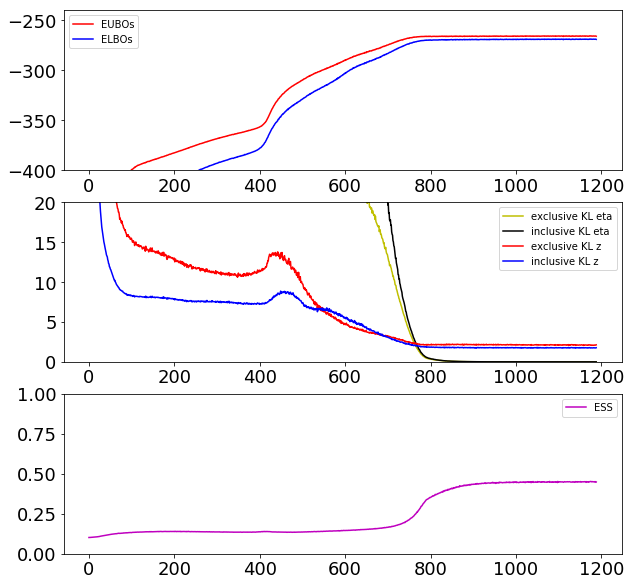

In [49]:
plot_results_ag(df)

In [5]:
df['ESS'].values

array(['2.671', '3.403', '3.906', ..., '5.687', '5.691', '5.689'],
      dtype=object)